C:\Users\nkalinin\AppData\Local\Temp\ipykernel_13408\1273358554.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  years = data.groupby("Year").mean()["Calls"]
C:\Users\nkalinin\AppData\Local\Temp\ipykernel_13408\1273358554.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthes = data.groupby("Month").mean()["Calls"]
C:\Users\nkalinin\AppData\Local\Temp\ipykernel_13408\1273358554.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be vali

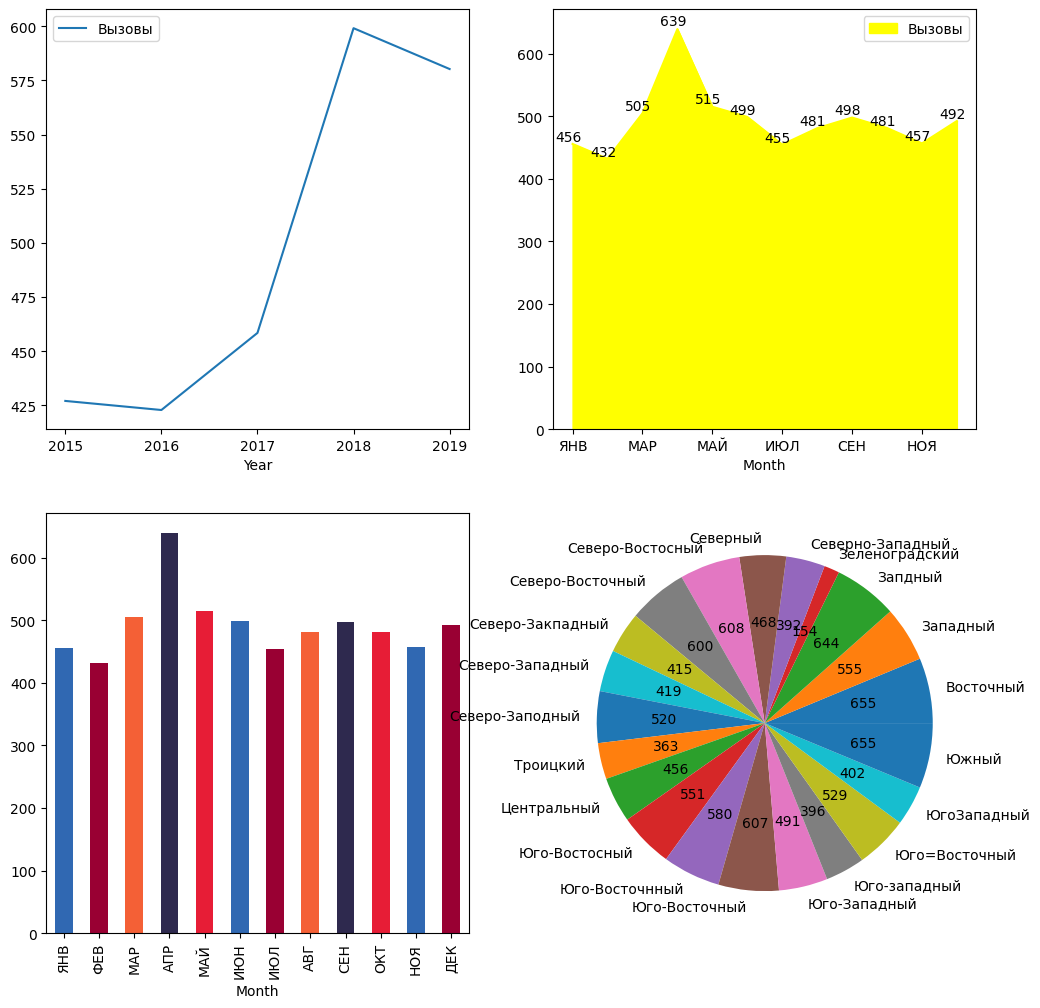

In [112]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv", delimiter=";")
data["Month"] = data["Month"].str.slice(0,3).str.upper()
data["AdmArea"] = data["AdmArea"].apply(lambda x: x.split(" ")[0])
#print(data["AdmArea"])
years = data.groupby("Year").mean()["Calls"]
fig = plt.figure(figsize=(12, 12))
area = fig.add_subplot(2, 2, 1)#2столбца,2строки, работаем с 1_ой из 4-х областей
years.plot.line(ax=area, label="Вызовы")
area.legend()
plt.xticks(years.index)#убираем дробность годов
#построим еще один график,взяв статистику по месяцам и сделаем другую группировку
area = fig.add_subplot(2, 2, 2)
monthes = data.groupby("Month").mean()["Calls"]
monthes = monthes.reindex(["ЯНВ","ФЕВ","МАР", "АПР", "МАЙ", "ИЮН", "ИЮЛ", "АВГ", "СЕН", "ОКТ", "НОЯ", "ДЕК"])
monthes.plot.area(ax=area, label="Вызовы", color = "yellow")
area.legend()
#посмотрим как можно вывести аннотацию на наш график, нам нужны конкретные значения
j = 0
for i in monthes:
    area.annotate(round(i), xy=(j-0.5, i*1.01))
    j +=1
#посмотрим при помощи столбчатой диаграммы

area = fig.add_subplot(2, 2, 3)
#coolors.co
monthes.plot.bar(ax=area, label="", color=["#3068B2", "#990033", "#F46036", "#2E294E", "#E71D36"])
#построим круговую диаграмму для округов(позволяет вывести большое кол-во значений и если данные могут быть просуммированны)
area = fig.add_subplot(2, 2, 4)
adm = data.groupby("AdmArea").filter(lambda x:x["Calls"].count() > 2)
adm = data.groupby("AdmArea").mean()["Calls"]
total = sum(adm)
adm.plot.pie(ax=area, label="",autopct=lambda x: int(total * x/100))

plt.show()



In [40]:
data= pd.read_csv("https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv", delimiter = ";")
print(data.head())

   global_id  ID  Year  UnemployedMen  UnemployedWomen  UnemployedYoung  \
0   39809862   1  2001           8896            25762             6696   
1   64592413   3  2003           8679            24967             6226   
2   64592414   4  2004           9822            25239             7318   
3   64592415   5  2005          10844            23597             6890   
4   64592416   6  2006          11041            22928             6604   

   UnemployedDisabled  UnemployedTotal   Period  Unnamed: 9  
0                 824            34658  Декабрь         NaN  
1                1155            33646  Декабрь         NaN  
2                1411            35061  Декабрь         NaN  
3                1531            34441  Декабрь         NaN  
4                1671            33969  Декабрь         NaN  


In [49]:
#удалим столбец с отсутствующими значениями
data = data.dropna(axis=1)
#сократим год до 2-х символов
data["Year"] = data["Year"]%100
print(data.head())

   global_id  ID  Year  UnemployedMen  UnemployedWomen  UnemployedYoung  \
0   39809862   1     1           8896            25762             6696   
1   64592413   3     3           8679            24967             6226   
2   64592414   4     4           9822            25239             7318   
3   64592415   5     5          10844            23597             6890   
4   64592416   6     6          11041            22928             6604   

   UnemployedDisabled  UnemployedTotal   Period  
0                 824            34658  Декабрь  
1                1155            33646  Декабрь  
2                1411            35061  Декабрь  
3                1531            34441  Декабрь  
4                1671            33969  Декабрь  


In [52]:
#построим график зависимости безработных мужчин и женщин от года
# и на этот график нанесем % безработных среди молодежи и людей с ограниченными возможностями
#для этого сгруппируем данные по годам
years = data.groupby("Year").mean()
#затем каждый набор значений приведем к процентам
years["UnemployedMen"]=years["UnemployedMen"]/years["UnemployedTotal"]
years["UnemployedWomen"]=years["UnemployedWomen"]/years["UnemployedTotal"]
years["UnemployedYoung"]=years["UnemployedYoung"]/years["UnemployedTotal"]
years["UnemployedDisabled"]=years["UnemployedDisabled"]/years["UnemployedTotal"]
print(years.head())

        global_id   ID  UnemployedMen  UnemployedWomen  UnemployedYoung  \
Year                                                                      
1      39809862.0  1.0       0.256680         0.743320         0.193202   
2     273573574.0  2.0       0.231332         0.768668         0.194859   
3      64592413.0  3.0       0.257950         0.742050         0.185044   
4      64592414.0  4.0       0.280140         0.719860         0.208722   
5      64592415.0  5.0       0.314857         0.685143         0.200052   

      UnemployedDisabled  UnemployedTotal  
Year                                       
1               0.023775          34658.0  
2               0.031660          35944.0  
3               0.034328          33646.0  
4               0.040244          35061.0  
5               0.044453          34441.0  


C:\Users\nkalinin\AppData\Local\Temp\ipykernel_13408\2350734359.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  years = data.groupby("Year").mean()


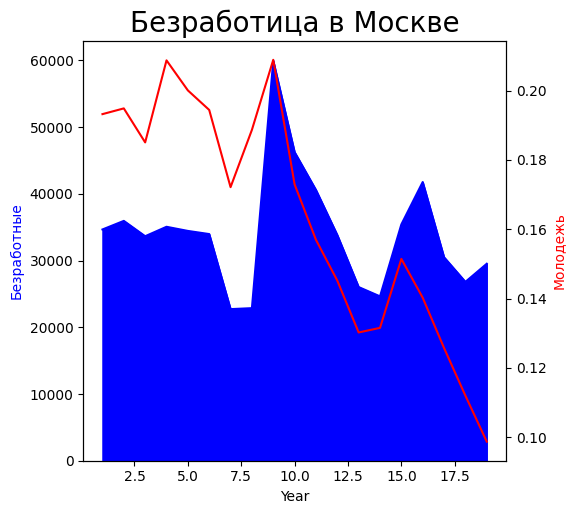

In [53]:
#приступим к формированию графика,взьмем холст 12Х12
fig = plt.figure(figsize=(12, 12))
#и нанесем на него 2 графика
area = fig.add_subplot(2, 2, 1)
area.set_title("Безработица в Москве", fontsize = 20)   #динамика общего числа безработных и процента безработных среди молодежи
years["UnemployedTotal"].plot.area(ax=area, color="blue")#основной график изменение общего числа безработных в Москве
#на этой области у нас будет два ряда значений,соответсвенно будет 2 оси У: справа и слева.
#для подписи оси используем тот же цвет, что и для серии данныx

area.set_ylabel("Безработные", color="blue")
#для добавления второй серии данных используем создание дублирующей области через область близнеца(т.е клонируем область)
area2 = area.twinx() 
# и 2-я серия данных будет содержать уже процентное значение,отобразим их в виде линии на фоне 1-ой области
years["UnemployedYoung"].plot.line(ax=area2, color="red")

area2.set_ylabel("Молодежь", color="red")

plt.show()

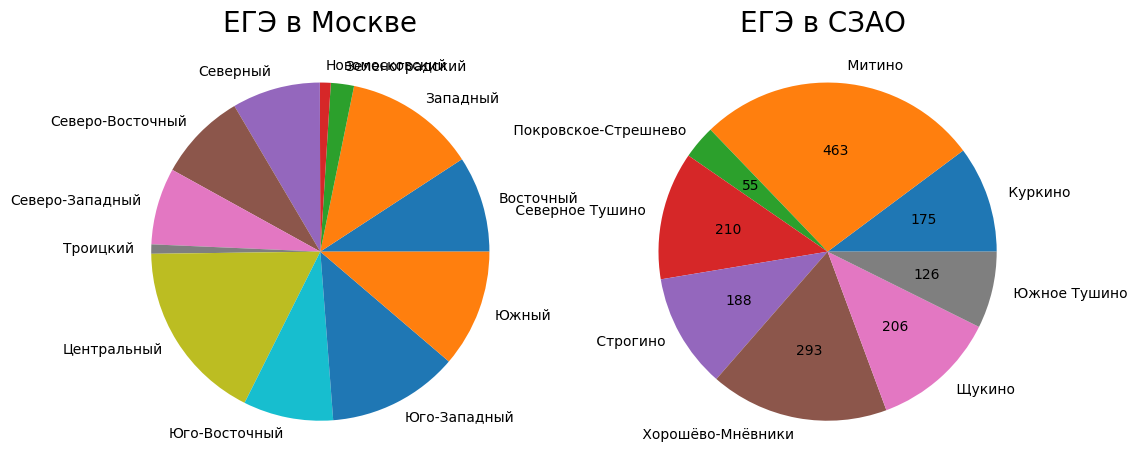

In [110]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter =";")
data = data.dropna(axis=1)
data["District"] = data["District"].str.replace("район","").astype("category")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0]).astype("category")
data = data.set_index("YEAR").loc["2018-2019"].reset_index()

#print(data.head())
fig = plt.figure(figsize=(12,12))
area = fig.add_subplot(1, 2, 1)
area.set_title("ЕГЭ в Москве", fontsize=20)
data_adm = data.set_index("AdmArea")
#print(data_adm["PASSES_OVER_220"])
data_adm["PASSES_OVER_220"].groupby("AdmArea").sum().plot.pie(ax=area, label="") 
#plt.show()
area = fig.add_subplot(1, 2, 2)
area.set_title("ЕГЭ в СЗАО ", fontsize=20)
data_district = data_adm.loc["Северо-Западный"].reset_index().set_index("District")
data_district = data_district["PASSES_OVER_220"].groupby("District").sum()
total = sum(data_district)
data_district.plot.pie(ax=area, label="",autopct=lambda x:round(total * x/100))
plt.show()

C:\Users\nkalinin\AppData\Local\Temp\ipykernel_13408\3617749828.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["PASSES_OVER_220"]).set(xlabel='', ylabel='', title ="Отличники по ЕГЭ по школам")


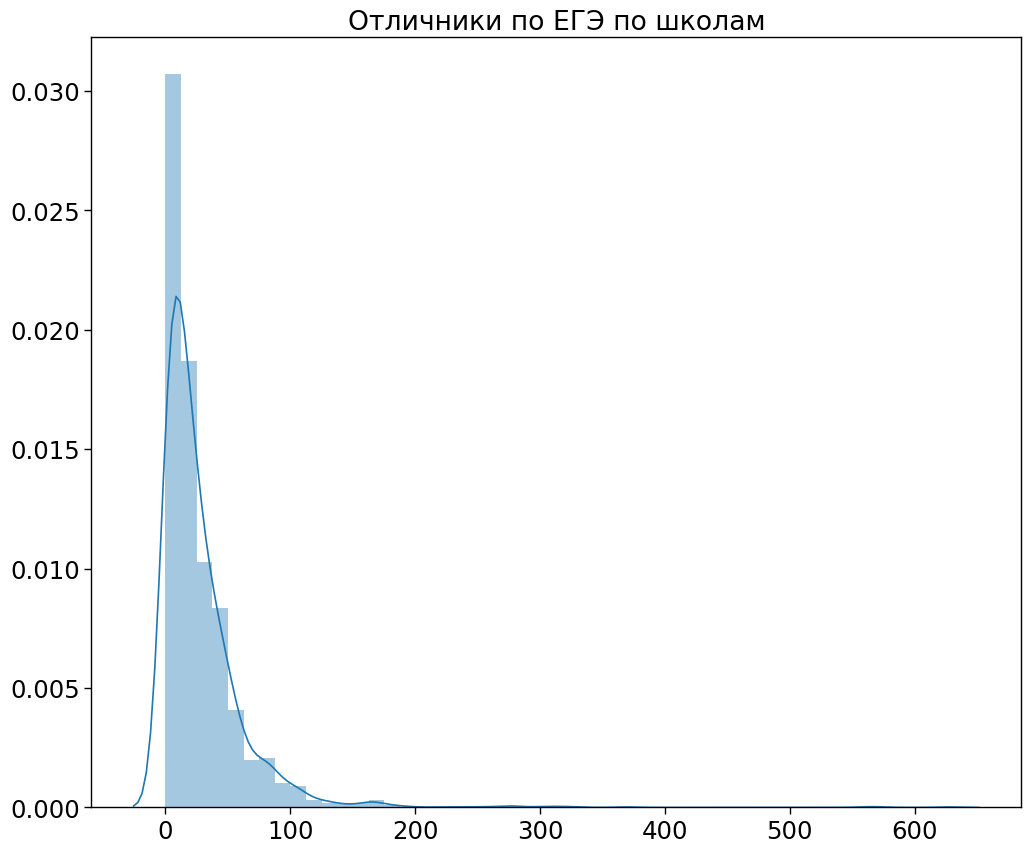

c:\users\nkalinin\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nkalinin\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nkalinin\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nkalinin\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings

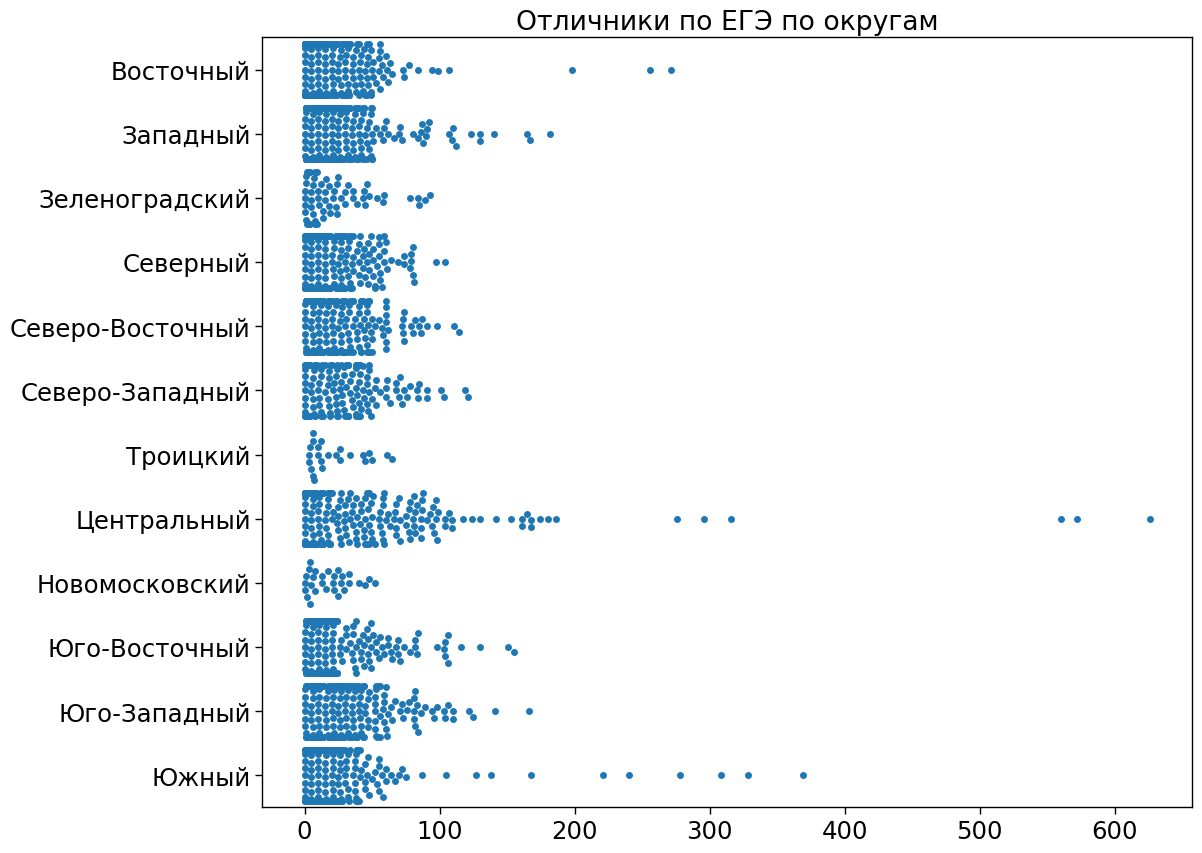

NameError: name 'show' is not defined

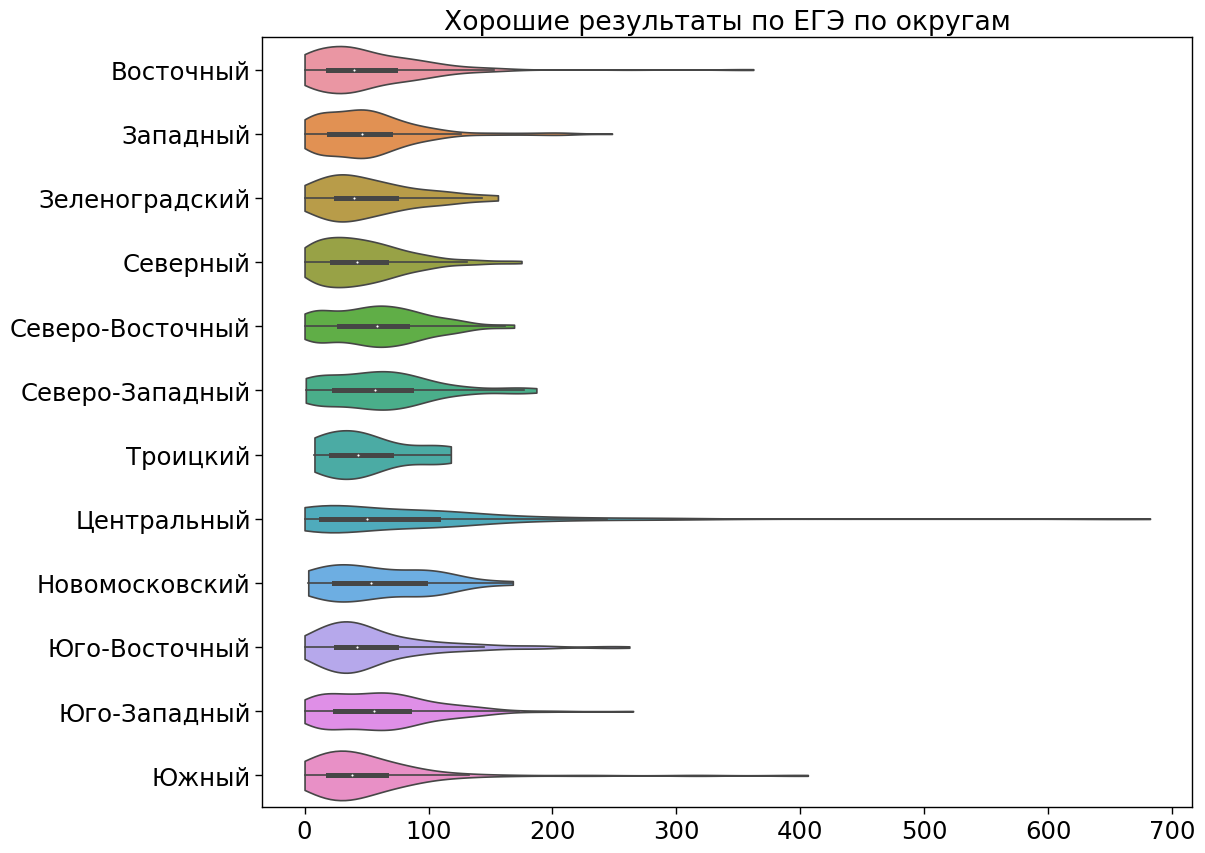

In [119]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams#задает размеры холста без непосредственного его создания

rcParams['figure.figsize'] = 12, 10  
sns.set_context("paper",font_scale = 2)#для seaborn увеличим шрифт по умлчанию
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter =";")
# Для округа Москвы сразу оставим только первое слово
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])
#построим базовый график по всем результатам по ЕГЭ
sns.distplot(data["PASSES_OVER_220"]).set(xlabel='', ylabel='', title ="Отличники по ЕГЭ по школам")
plt.show()
#Теперь построим разновидность ящичковой диаграммы график "Улей" по округам Москвы
sns.swarmplot(x="PASSES_OVER_220", y="AdmArea", data = data).set(xlabel='', ylabel='', title ="Отличники по ЕГЭ по округам")
plt.show()
#ещё одна разновидность графика-"Скрипка"-ящик с усами, нагляднее показывает разницу в характере распределения значений по округам
sns.violinplot(x="PASSER_UNDER_160", y="AdmArea", data = data, cut=0)
#для графика "Скрипка" выставим доп параметры через объект matplotlib
plt.xlabel('')
plt.ylabel('')
plt.title('Хорошие результаты по ЕГЭ по округам')
plt,show()

0          Батова
1          корпус
2              31
3         Планета
4         Колибри
          ...    
2181    киношкола
2182          514
2183         2016
2184          878
2185          939
Name: EDU_NAME_TITLE, Length: 2186, dtype: object


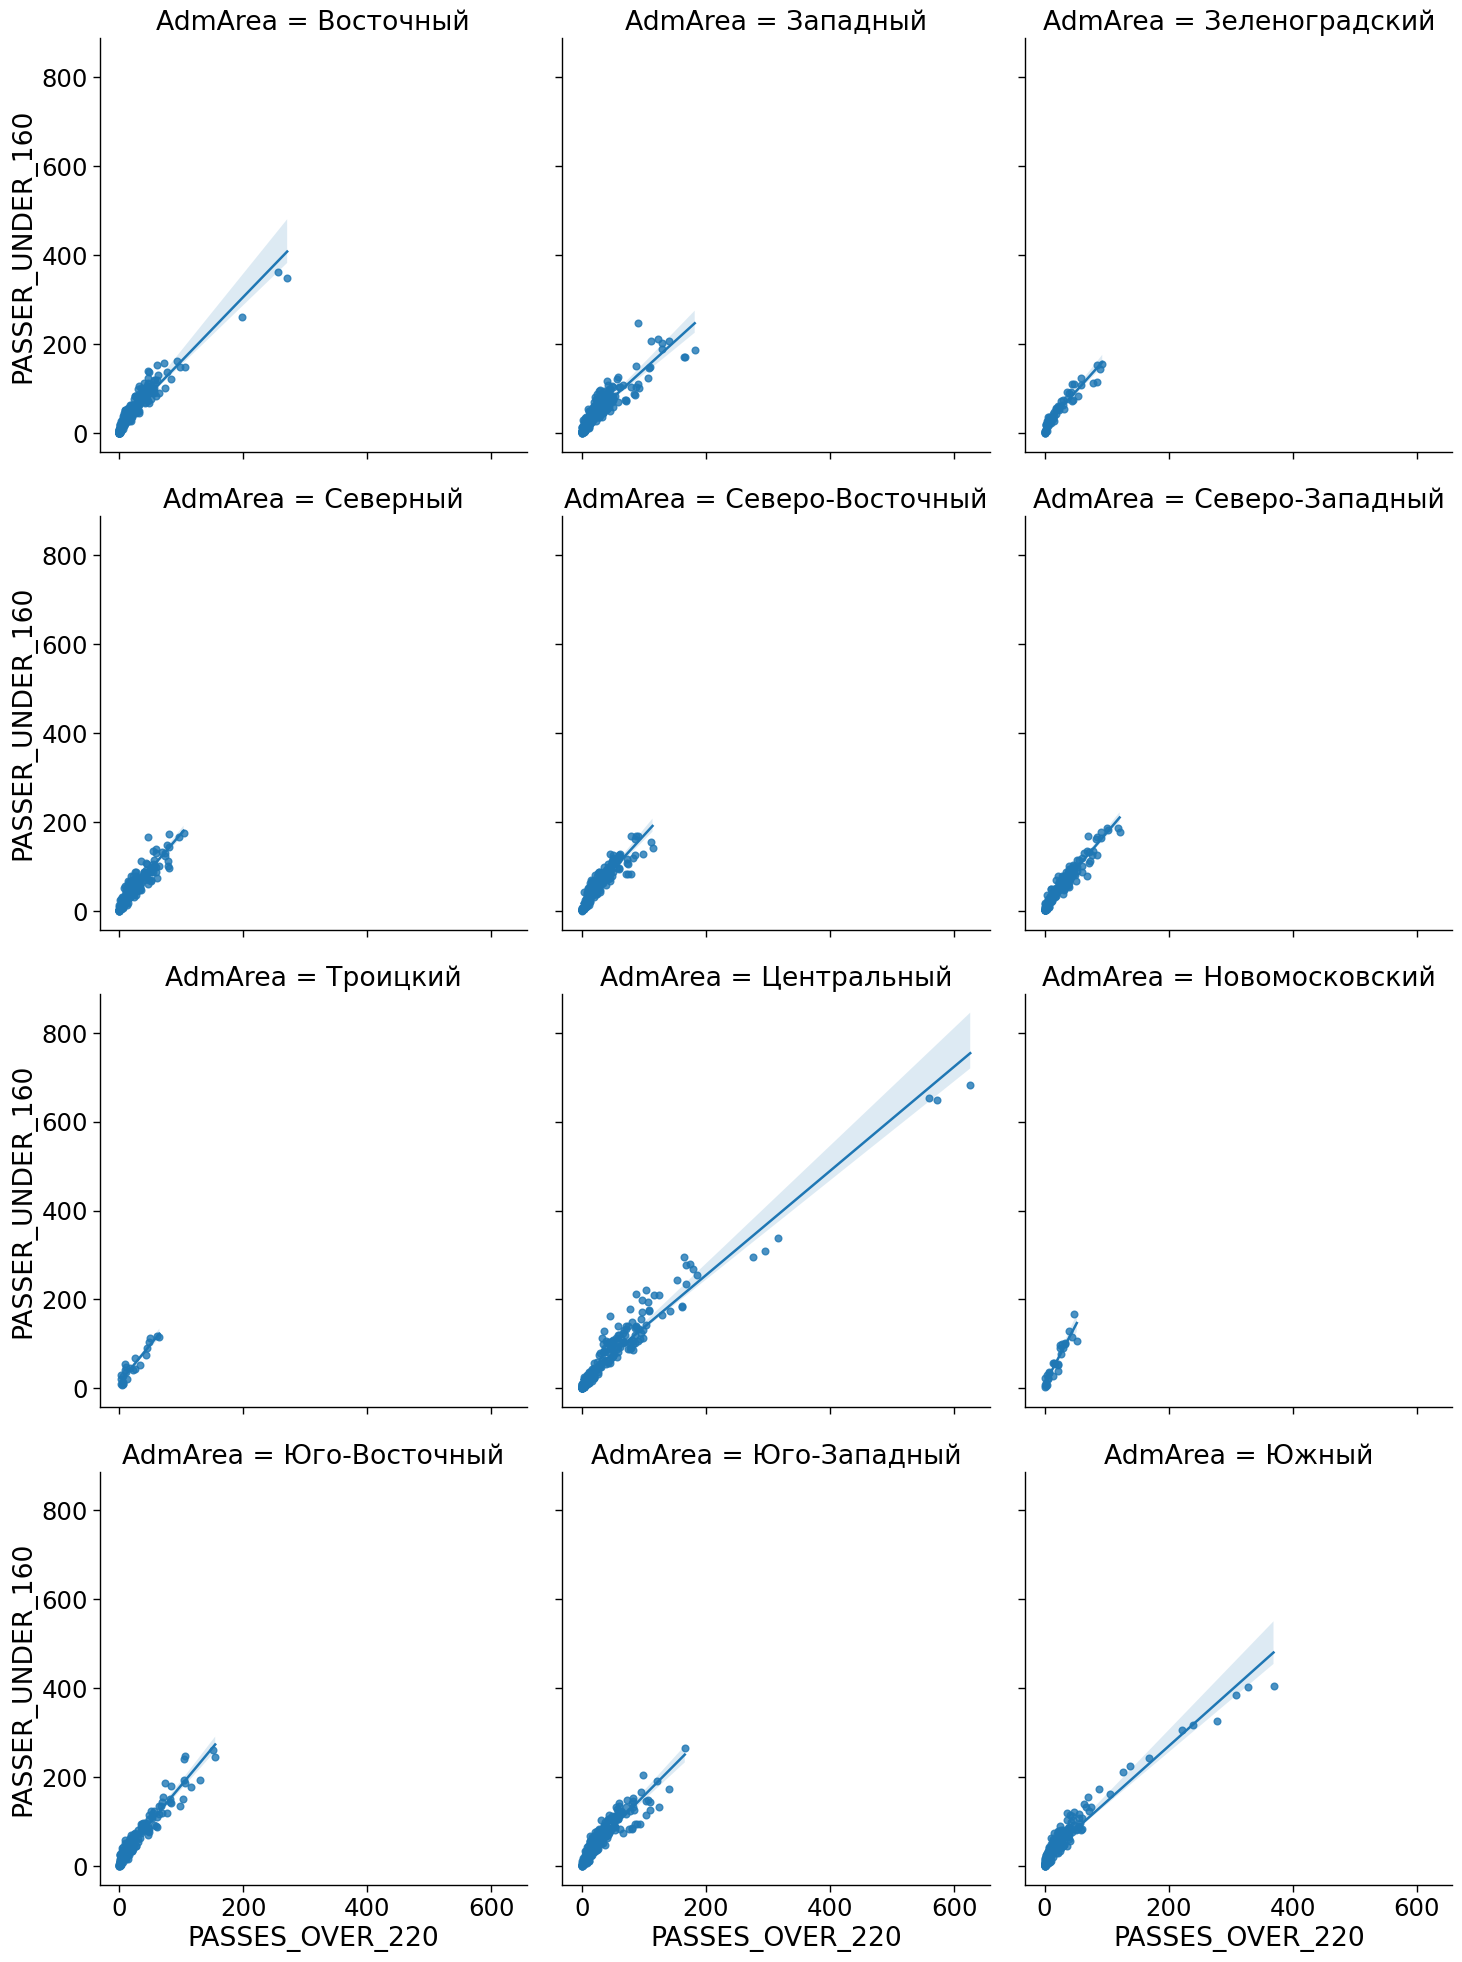

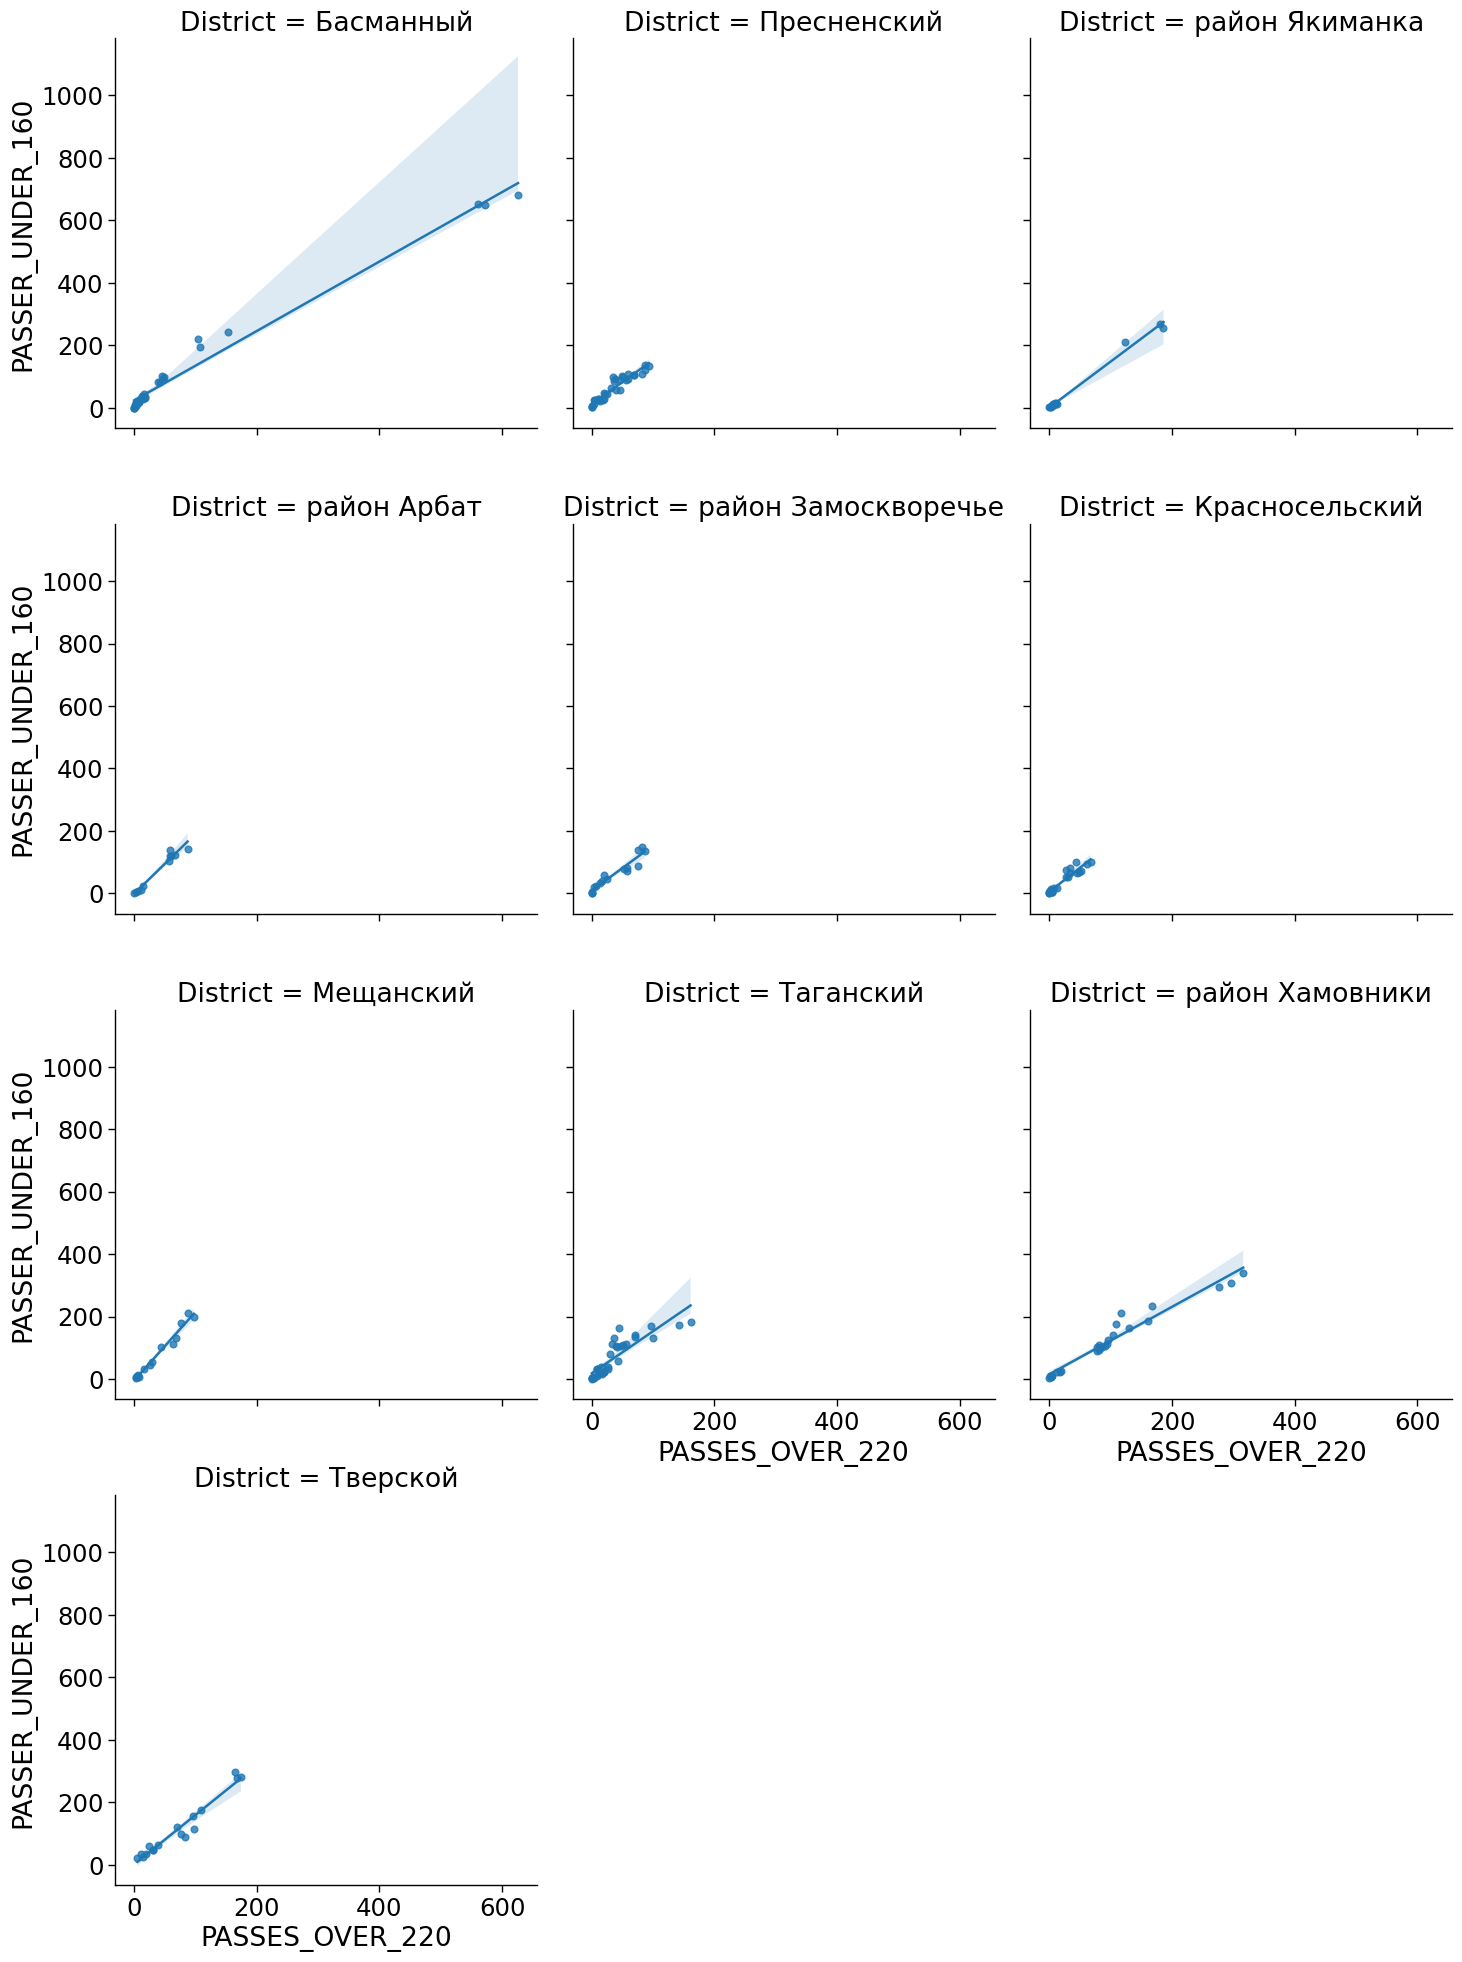

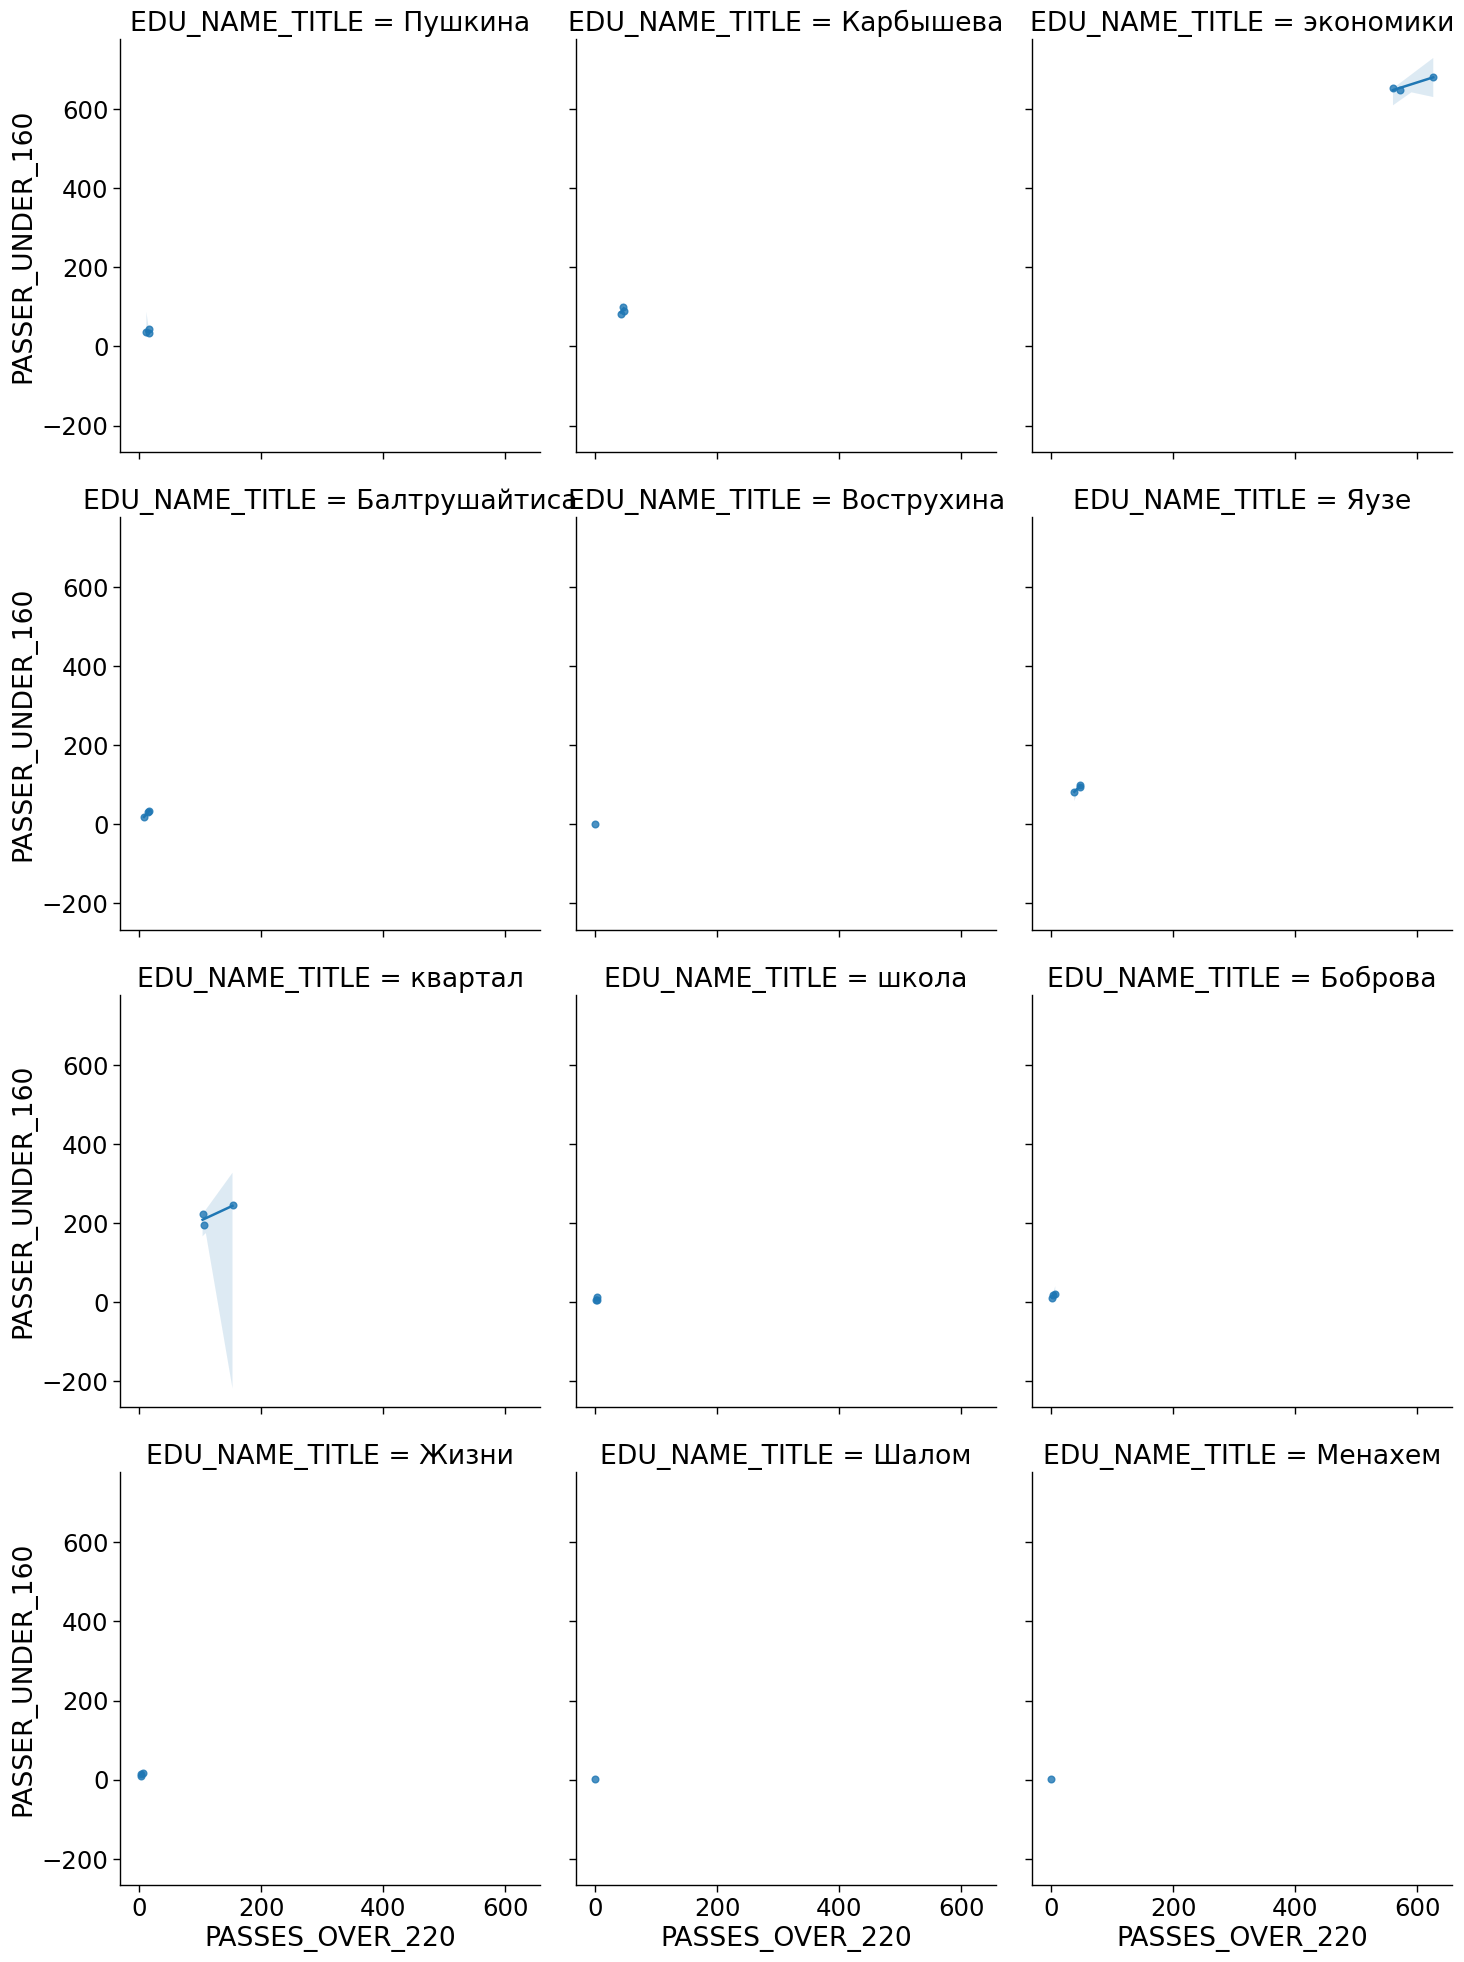

EDU_NAME_TITLE
экономики               Федеральное государственное автономное образовательное учреждение высшего «Национальный исследовательский университет «Высшая школа экономики». лицей «Национального исследовательского университета «Высшая школа экономики»
экономики                                                                                                                                                         Общеобразовательная автономная некоммерческая организация «Школа права и экономики»
экономики                                                                                                                                                         Общеобразовательная автономная некоммерческая организация «Школа права и экономики»
экономики                                                                Федеральное государственное автономное образовательное учреждение высшего профессионального образования «Национальный исследовательский университет «Высшая школа экономики»
э

In [158]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 12 
sns.set_context("paper",font_scale = 2)#для seaborn увеличим шрифт по умлчанию
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter =";")
pd.options.display.max_colwidth=1000
#print(data["EDU_NAME"])
#немного преобразуем данные: 
#оставим от округа только первое слово, а от района уберём район,для школы введём сокращённый индекс
# последнее слово, чтобы было нагляднее на графике.
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])
data["District"] = data["District"].str.replace(" район","")
data["EDU_NAME_TITLE"]= data["EDU_NAME"].apply(lambda x:x.split(" ")[-1]. replace("«","").replace("»",""))
#print(data["EDU_NAME_TITLE"])
#теперь построим серию графиков разброса по группам данных используя lmplot
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data, col="AdmArea",col_wrap=3, truncate=True)
# col"AdmArea"-набор колонок для группировки
#col_wrap=3 -кол-во графиков с строке,
#truncate-построим график по имеющимся значениям,отсечём расширение графика через параметр truncate 
#print(data.head())
plt.show()
#теперь построим серию уточняющих графиков по району в центральном адм округе,чтобы дойти до школы или нескольких школ с аномльными 
#значениями успеваимости
data1 =data.set_index("AdmArea").loc["Центральный"]
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data1, col="District",col_wrap=3, truncate=True)
plt.show()
#выбросы наблюдаются в Басманном районе,аналогичным образом отсекаем только этот район и построим пот нему график,используя 
#наше сокращённое название школы,как название категории
data2 = data1.set_index("District").loc["Басманный"]
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data2, col="EDU_NAME_TITLE",col_wrap=3, truncate=True)
plt.show()
#теперь найдём полное название школы
pd.options.display.max_colwidth=1000#т.к pandas обрезает полное название нужно выставить доп настройки
print(data.set_index("EDU_NAME_TITLE").loc["экономики"]["EDU_NAME"])

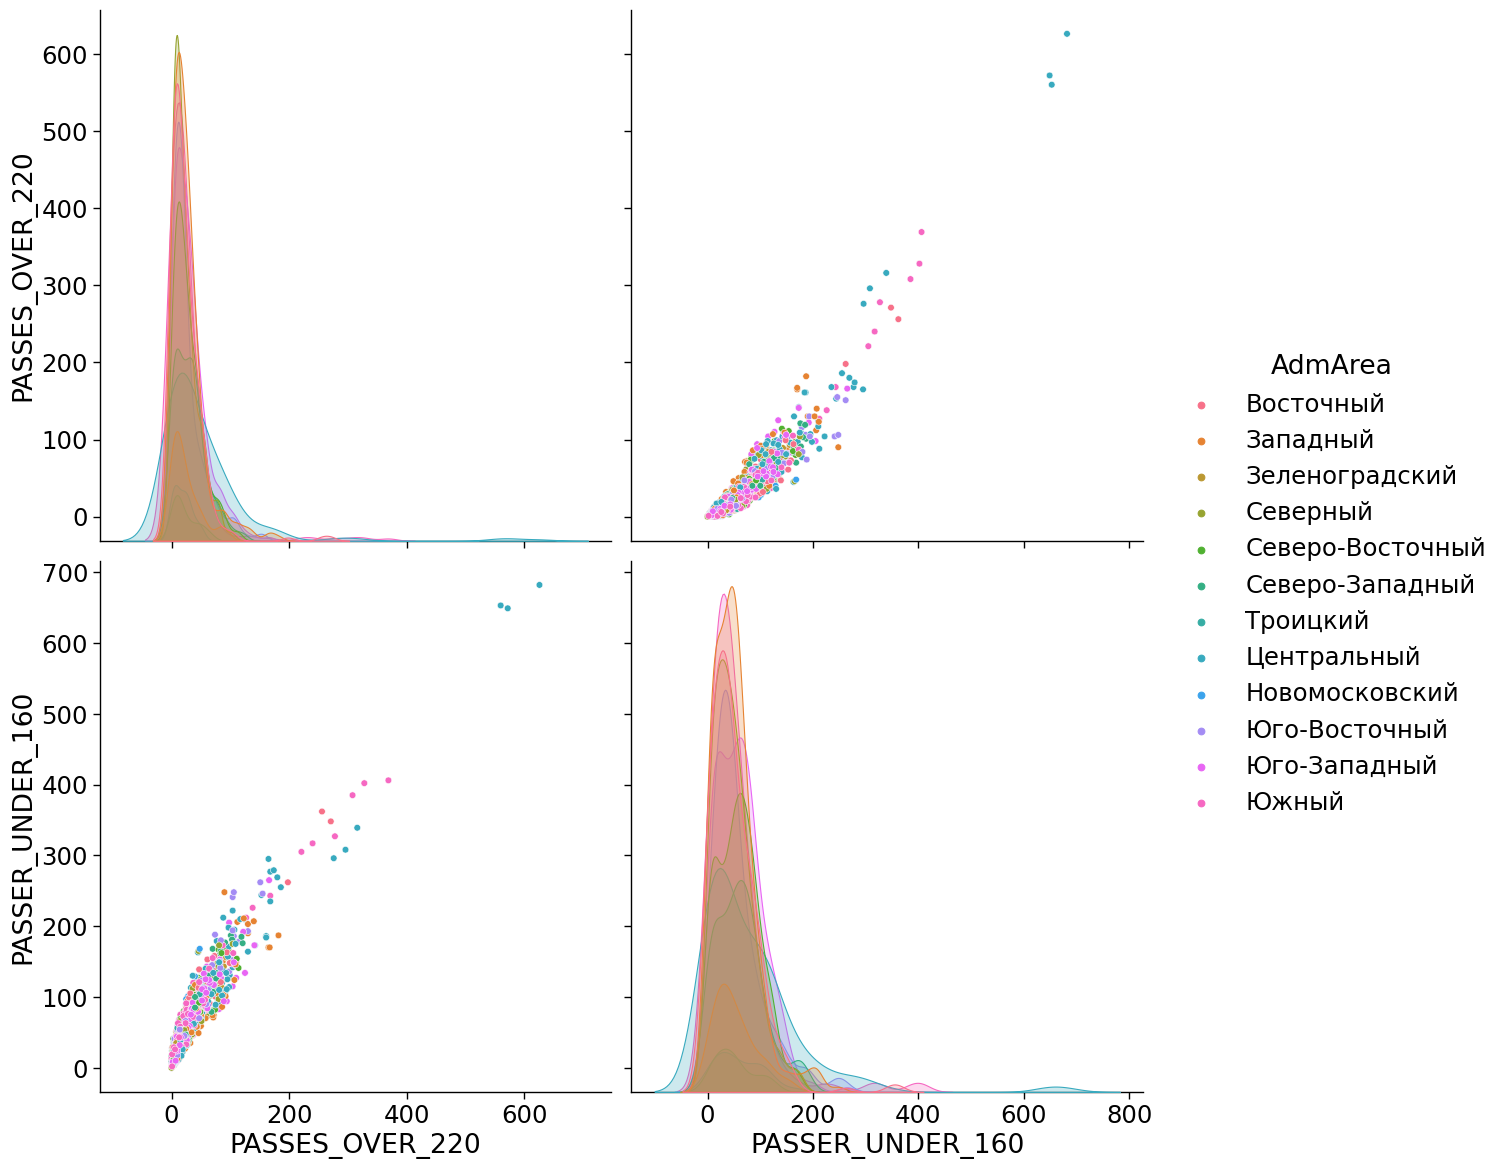

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 positional arguments (and 2 keyword-only arguments) were given

In [195]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np
import scipy.stats as stats
sns.set_context("paper",font_scale = 2)
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter =";")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])
#для первичного анализа данных,нахождения корреляции в наших сериях построим парный график разбросов по числовым данным
data1 = pd.DataFrame(data,columns=["PASSES_OVER_220", "PASSER_UNDER_160","AdmArea"])
sns.pairplot(data1, hue = "AdmArea", height =6)
plt.show()
sns.jointplot("PASSES_OVER_220", "PASSER_UNDER_160",data,  height =12, kind = "kde").annotate(stats.pearsonr)
plt.show()
print(round(stats.pearsonr(data["PASSES_OVER_220"],data["PASSER_UNDER_160"])[0], 2))

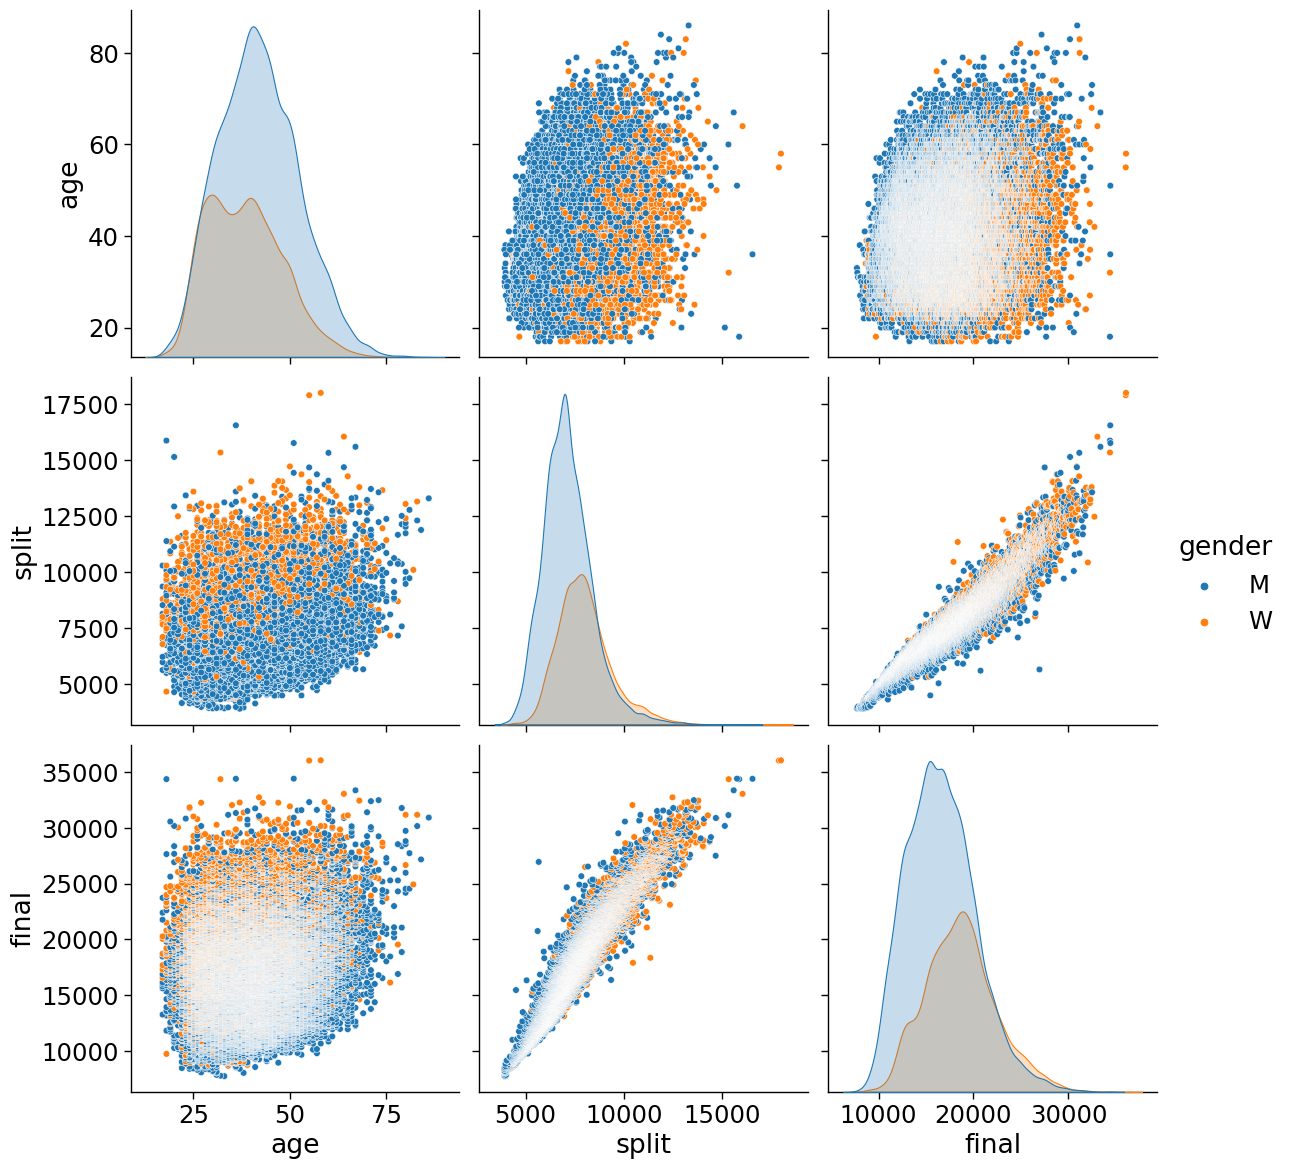

0.96
   age gender  split  final
0   33      M   3938   7731
1   32      M   3986   7768
2   31      M   4009   7842
3   38      M   3976   8025
4   31      M   3992   8039


In [197]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np
import scipy.stats as stats

def convert_time(a):
    return sum(x*int(t) for x,t in zip([3600, 60, 1],a.split(":")))
data = pd.read_csv("https://video.ittensive.com/python-advanced/marathon-data.csv")
data["split"]=data["split"].apply(convert_time)
data["final"]=data["final"].apply(convert_time)
sns.pairplot(data, hue ="gender", height = 4)
plt.show()
#sns.jointplot(data , "split", "final",height =12, kind = "kde")
plt.show()
print(round(stats.pearsonr(data["split"],data["final"])[0], 2))
print(data.head())

            Month  Day  Year     F         C
Date                                        
1995-01-01      1    1  1995  32.3  0.166667
1995-01-02      1    2  1995  31.7 -0.166667
1995-01-03      1    3  1995  26.8 -2.888889
1995-01-04      1    4  1995  15.9 -8.944444
1995-01-05      1    5  1995  23.8 -4.555556
...           ...  ...   ...   ...       ...
2019-10-31     10   31  2019  26.4 -3.111111
2019-11-01     11    1  2019  29.5 -1.388889
2019-11-02     11    2  2019  34.3  1.277778
2019-11-03     11    3  2019  35.8  2.111111
2019-11-04     11    4  2019  43.9  6.611111

[9075 rows x 5 columns]


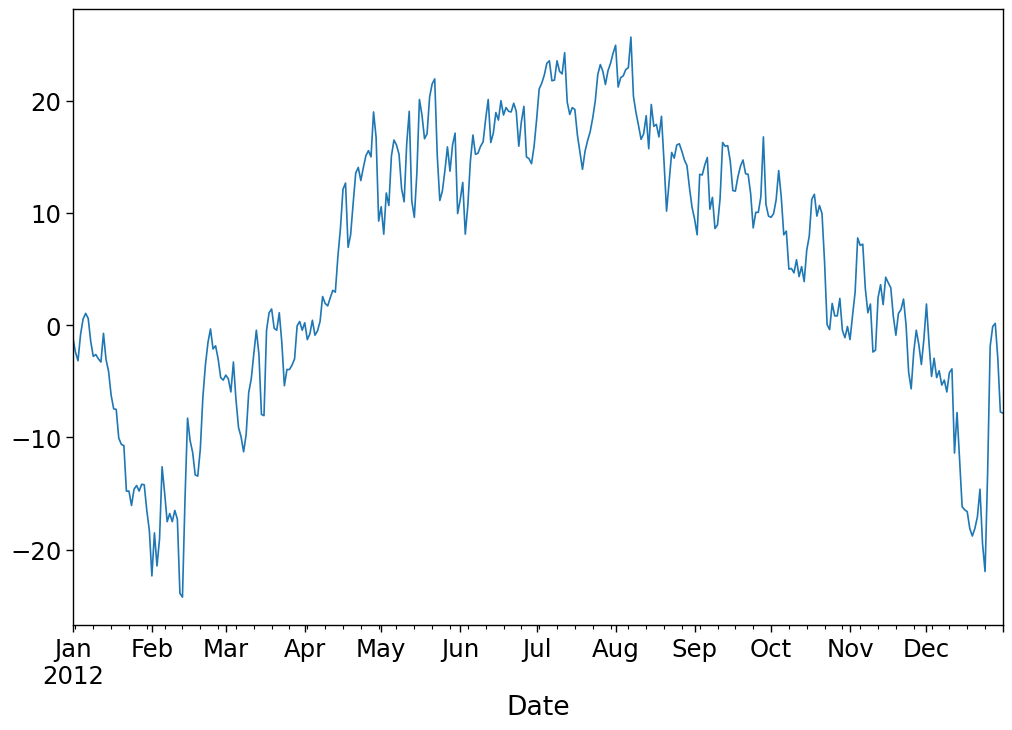

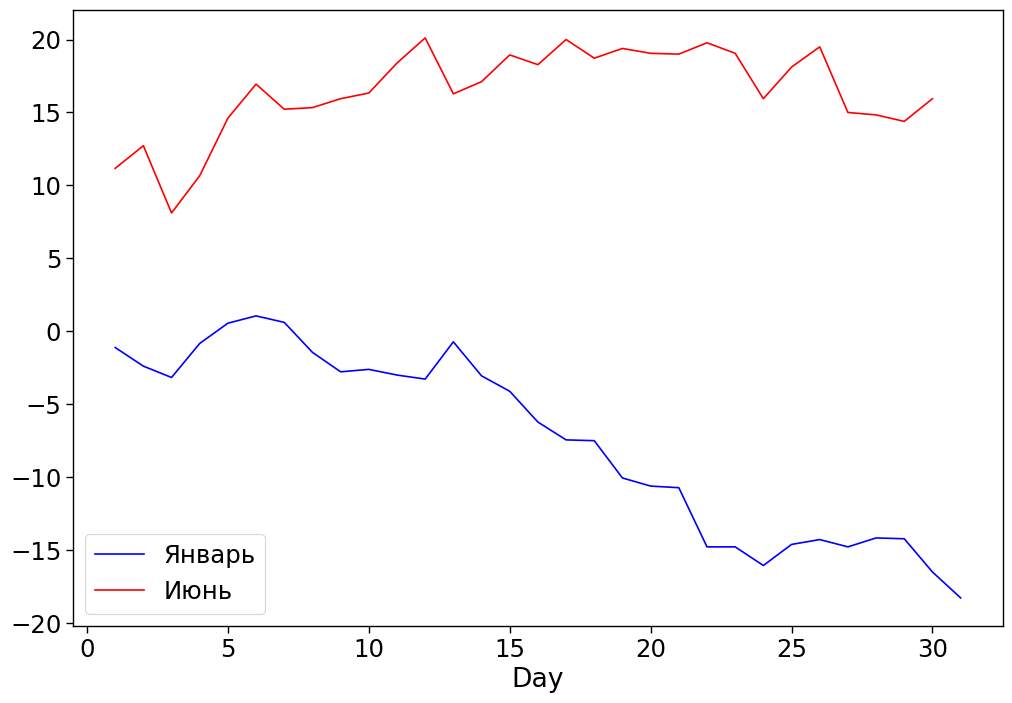

In [209]:
#ВРЕМЕННЫЕ РЯДЫ:СЕРИИ ДАННЫХ

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 8 
data = pd.read_csv("https://video.ittensive.com/python-advanced/weather-moscow.txt",delimiter="\t",names=["Month", "Day", "Year", "F"])
#посмотрим на данные и введём доп серию для корректной даты
data["Date"] = data.astype(str).Year + "-" + data.astype(str).Month + "-" + data.astype(str).Day
#также переведём температуру из фаренгейтов в цельсии
data["C"]= (data["F"]-32)/1.8
data = data.set_index("Date")
data.index = pd.to_datetime(data.index)
print(data)
#теперь всё готово для построения графиков
data["C"]["2012-01":"2012-12"].plot()
plt.show()
#теперь нанесём данные за январь и июнь на одном графике, чтобы их сравнить
data.loc["2012-01"].reset_index().set_index("Day")["C"].plot(color='blue',label='Январь')
data.loc["2012-06"].reset_index().set_index("Day")["C"].plot(color='red',label='Июнь')
plt.legend()
plt.show()

   Month  Day  Year     F
0      1    1  1995  32.3
1      1    2  1995  31.7
2      1    3  1995  26.8
3      1    4  1995  15.9
4      1    5  1995  23.8


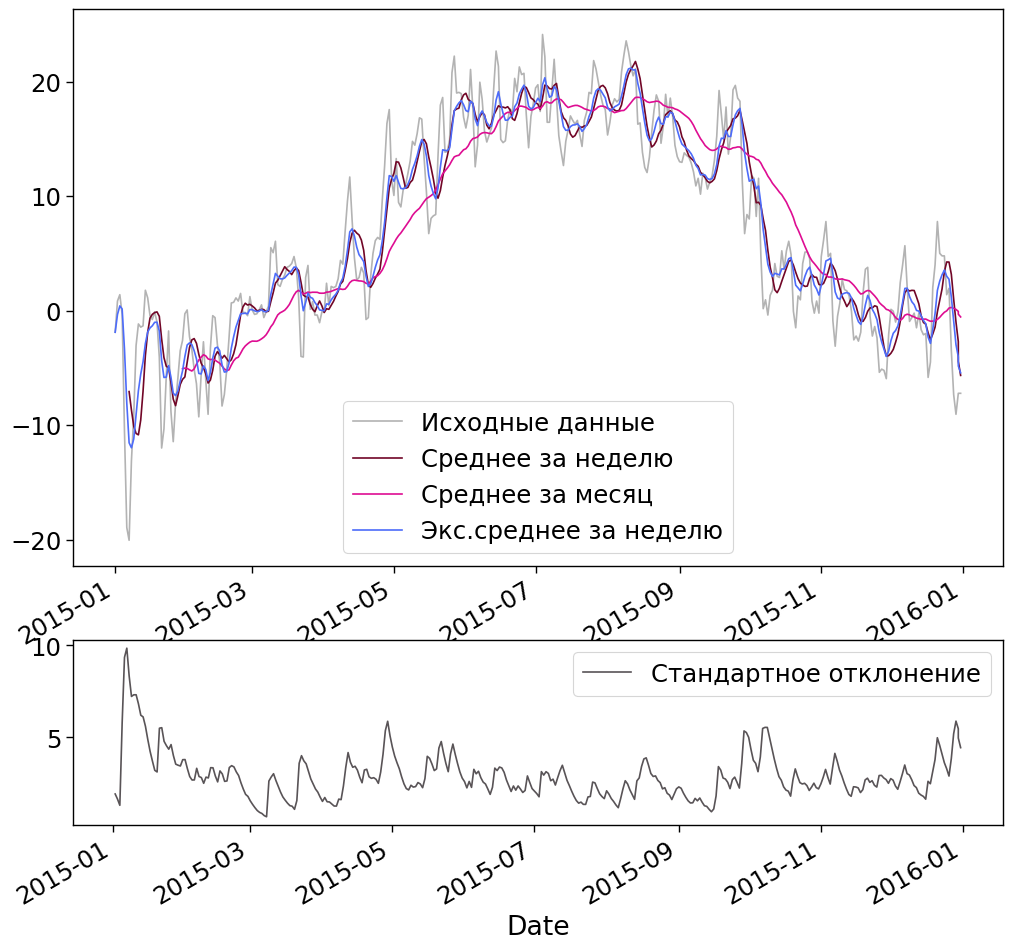

In [216]:
#Скользящие средние и отклонения
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#создадим наш холст
fig =plt.figure(figsize=(12, 12))
#используем доп параметры, чтобы разделить его на две неравные области в пропорции 3 к 1
(area1, area2) = fig.subplots(2, 1, gridspec_kw = {'height_ratios' : [3, 1]})
data = pd.read_csv("https://video.ittensive.com/python-advanced/weather-moscow.txt",delimiter="\t",names=["Month", "Day", "Year", "F"])
print(data.head())
#преобразуем данные
data["Date"] = pd.to_datetime(data.astype(str).Year + "-" + data.astype(str).Month + "-" + data.astype(str).Day)
data["C"]= (data["F"]-32)/1.8
data = data.set_index("Date")#выставим индекс из серии дат
data["C"]["2015"].plot(ax= area1,color=".7",label="Исходные данные") 
#plt.show()
#добавим к данным ещё две серии: усреднение по семи дням(по неделе)и по 30-и значениям(за месяц) с соответствующими заголовками
#при отсутствии параметра мин периодс усреднение будет производится на основании прошлых данных(т.е прошлых 7 и 30 дней).
#поэтому его нельзя использовать для предсказания ситуации, но данный метод подходит для ретроспективного анализа
data["C"]["2015"].rolling(window=7).mean().plot(ax = area1,color="#710627",label="Среднее за неделю") 
data["C"]["2015"].rolling(window=30).mean().plot(ax=area1,color="#DE0D92",label="Среднее за месяц")
#вместо уточнения усреднения, добавления параметра мин периодс для скользящего окна,воспользуемся экспоненциальным средним,
#которое наначает больше веса не давним значениям и меньше веса более старым.В большинстве случаев именно экспоненц среднее
#позволяет более точно предсказывать тренды
data["C"]["2015"].ewm(span=7).mean().plot(ax=area1,color="#4D6CFA",label="Экс.среднее за неделю")
area1.legend()
# ниже, непосредственно под значениями температуры выведем отклонения экс.среднего как показатель изменчивости температуры
#за неделю
data["C"]["2015"].ewm(span=7).std().plot(ax=area2,color="#595457",label="Стандартное отклонение")
area2.legend()
plt.show()
#усреднение показателей меры изменчивости и других технических индикаторов, поволяет быстро проанализировать 
#ситуацию в ретроспективе и принять верное решение  

In [237]:
#Свечные графики
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

open_data = [33.0, 33.3, 33.5]
high_data = [33.1, 33.3, 33.6]
low_data = [32.7, 32.7, 32.8]
close_data = [33.0, 32.9, 33.0]
dates = [datetime(year = 2018, month = 10, day = 10),
         datetime(year = 2018, month = 11, day = 10),
         datetime(year = 2018, month = 12, day = 10)]
fig = go.Figure(data = [go.Candlestick(x = dates,
                        open = open_data, high = high_data,
                        low = low_data, close = close_data)])    
fig.show()
data = pd.read_csv("https://video.ittensive.com/python-advanced/finance-charts-apple.csv")
fig = go.Figure(data = [go.Candlestick(x = data["Date"],
                        open = data["AAPL.Open"], high = data["AAPL.High"],
                        low = data["AAPL.Low"], close = data["AAPL.Close"])]) 
fig.show()
#print(data.head())

C:\Users\nkalinin\AppData\Local\Temp\ipykernel_13408\641113895.py:12: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

C:\Users\nkalinin\AppData\Local\Temp\ipykernel_13408\641113895.py:13: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

C:\Users\nkalinin\AppData\Local\Temp\ipykernel_13408\641113895.py:19: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

C:\Users\nkalinin\AppData\Local\Temp\ipykernel_13408\641113895.py:20: FutureWarning:

Indexing a DataFrame with a datetimelike index using a sing

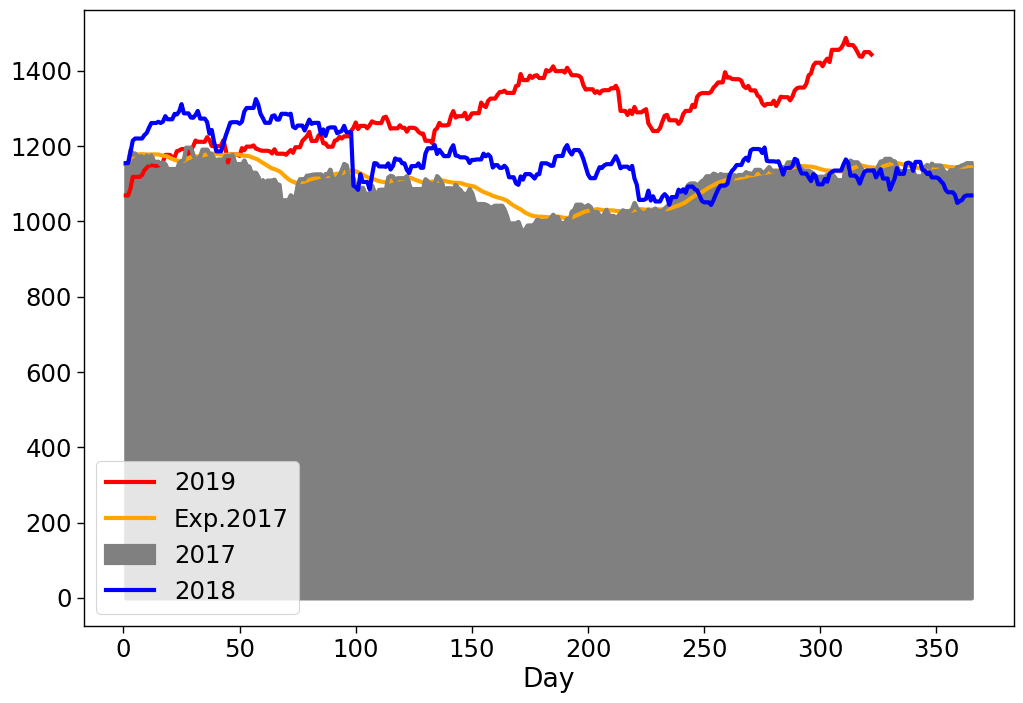

C:\Users\nkalinin\AppData\Local\Temp\ipykernel_13408\641113895.py:23: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



DatetimeIndex(['2019-02-19'], dtype='datetime64[ns]', name='Date', freq=None)


In [234]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://video.ittensive.com/python-advanced/rts-index.csv")
data["Date"] = pd.to_datetime(data['Date'], dayfirst=True)
dates = pd.date_range(min(data["Date"]),max(data["Date"]))
data = data.set_index("Date")
data = data.reindex(dates).ffill()
data["Day"]= pd.to_datetime(data.index).dayofyear
data.index.name = "Date"
data = data.sort_index()
data_2019 = data["2019"].reset_index().set_index("Day")
data_2017 = data["2017"].reset_index().set_index("Day")["Max"].ewm(span=20).mean()

fig = plt.figure(figsize=(12, 8))
area = fig.add_subplot(1, 1, 1)
data_2019["Close"].plot(ax=area, color ="red", label = "2019", lw=3)
data_2017.plot(ax=area, color ="orange", label = "Exp.2017", lw=3)
data["2017"].reset_index().set_index("Day")["Close"].plot.area(ax=area, color =".5", label = "2017", lw=3)
data["2018"].reset_index().set_index("Day")["Close"].plot(ax=area, color ="blue", label = "2018", lw=3)
plt.legend()
plt.show()
data_fall = data_2019[data_2019["Close"]< data_2017[0 :len(data_2019)]]
data_fall.set_index("Date",inplace=True)
data_fall = data_fall.sort_index(ascending = False)

print(data_fall.head(1).index)

#print(data_2019.head())